<a href="https://colab.research.google.com/github/F7Villani/ECM514-Ciencia-dos-Dados/blob/main/IMT_ex_combine_reshape_yahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Combinação, Reshape e outras transformações dos dados

Referências e Materiais úteis para este Lab:

- [Notas de Aula](https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_Pandas_I.ipynb)
- [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- [Pandas Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html)
---



In [ ]:
import numpy as np
import pandas as pd

path = 'https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/'

# **CASE: Yahoo Finance**

Nos exercícios a seguir partimos da seguinte base de dados extraída do `yahoo finance`:

<small>
Para consulta de ativos no Yahoo Finance, pesquise em: https://ca.finance.yahoo.com/lookup

In [ ]:
%%capture
!pip install yfinance

In [ ]:
import yfinance as yf

data = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'BRL=X', 'BTC-USD'],'2019-01-01','2023-03-01')
data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                               Close  \
               BRL=X      BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP   BRL=X   
Date                                                                       
2019-01-01    3.8800  3843.520020        NaN        NaN      NaN  3.8800   
2019-01-02    3.8799  3943.409424  31.761528  11.060243  91012.0  3.8799   
2019-01-03    3.7863  3836.741211  32.285172  11.331462  91564.0  3.7863   
2019-01-04    3.7551  3857.717529  31.744356  11.363637  91841.0  3.7551   
2019-01-05       NaN  3845.194580        NaN        NaN      NaN     NaN   

                                                        ...    Open  \
                BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP  ...   BRL=X   
Date                                                    ...           
2019-01-01  3843.520020        NaN        NaN      NaN  ...  3.8800   
2019-01-02  3943.409424  37.000000  24.059999  91012.0  ...  3.8799   
2019-01-03  3836.741211  37.610001  24.650000  91564.0  ...  3.7866   
2019-01-04  3857.717529  36.980000  24.719999  91841.0  ...  3.7550   
2019-01-05  3845.194580        NaN        NaN      NaN  ...     NaN   

                                                       Volume              \
                BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP  BRL=X     BTC-USD   
Date                                                                        
2019-01-01  3746.713379        NaN        NaN      NaN    0.0  4324200990   
2019-01-02  3849.216309  35.439999  22.549999  87887.0    0.0  5244856836   
2019-01-03  3931.048584  36.750000  23.959999  91011.0    0.0  4530215219   
2019-01-04  3832.040039  37.220001  24.850000  91577.0    0.0  4847965467   
2019-01-05  3851.973877        NaN        NaN      NaN    NaN  5137609824   

                                                
              ITUB4.SA     PETR4.SA      ^BVSP  
Date                                            
2019-01-01         NaN          NaN        NaN  
2019-01-02  25581700.0  104534800.0  5615400.0  
2019-01-03  21938600.0   95206400.0  6066200.0  
2019-01-04  24873500.0   72119800.0  5322100.0  
2019-01-05         NaN          NaN        NaN  

[5 rows x 30 columns]

## Q1. `pd.concat()`. 

Selecione o valor de fechamento ajustado de cada ticket produzindo um DataFrame `df` com o seguinte aspecto: 


In [ ]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q1.csv').head()

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-01,3.8800,3843.520020,NaN,NaN,NaN
1,2019-01-02,3.8799,3943.409424,31.761532,11.060242,91012.0
2,2019-01-03,3.7863,3836.741211,32.285156,11.331462,91564.0
3,2019-01-04,3.7551,3857.717529,31.744347,11.363639,91841.0
4,2019-01-05,NaN,3845.194580,NaN,NaN,NaN


As colunas acima são compostas. Veja um exemplo para extrair a cotação do Dólar em Reais. 

In [ ]:
data[('Adj Close', 'BRL=X')]

Date
2019-01-01    3.8800
2019-01-02    3.8799
2019-01-03    3.7863
2019-01-04    3.7551
2019-01-05       NaN
               ...  
2023-02-24    5.1362
2023-02-25       NaN
2023-02-26       NaN
2023-02-27    5.2078
2023-02-28    5.1997
Freq: D, Name: (Adj Close, BRL=X), Length: 1520, dtype: float64

In [ ]:
df = data['Adj Close']


In [ ]:
#@markdown Must be `True`
len(df) == 1520

True

(Moodle) Qual a soma de todos os valores do dataframe (exceto o campo de datas)? 

In [ ]:
df.sum().sum()

145801021.607893

## Q2. `df.loc`. 

Crie para o ticket `BTC-USD` um DataFrame `df_day_gain` como abaixo com a informação de `day_gain`, onde `True` significa um valor maior do ativo no dia seguinte. 

In [ ]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q2.csv').head()

,Date,day_gain
0,2019-01-02,True
1,2019-01-03,False
2,2019-01-04,True
3,2019-01-05,False
4,2019-01-06,True


In [ ]:
df = df.reset_index()
df

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-01,3.8800,3843.520020,NaN,NaN,NaN
1,2019-01-02,3.8799,3943.409424,31.761528,11.060243,91012.0
2,2019-01-03,3.7863,3836.741211,32.285172,11.331462,91564.0
3,2019-01-04,3.7551,3857.717529,31.744356,11.363637,91841.0
4,2019-01-05,NaN,3845.194580,NaN,NaN,NaN
...,...,...,...,...,...,...
1515,2023-02-24,5.1362,23198.126953,25.652184,25.900000,105873.0
1516,2023-02-25,NaN,23175.375000,NaN,NaN,NaN
1517,2023-02-26,NaN,23561.212891,NaN,NaN,NaN
1518,2023-02-27,5.2078,23522.871094,25.322412,26.150000,105711.0


In [ ]:

day_gain = []
print(len(df))
for i in range(1, len(df)):
  day_gain.append(df.loc[i, 'BTC-USD'] - df.loc[i-1, 'BTC-USD'] > 0) 

df_day_gain = pd.DataFrame()
df_day_gain['day_gain'] = day_gain
df_day_gain.value_counts()

1520


day_gain
True        784
False       735
dtype: int64

In [ ]:
df_day_gain['date'] = df.loc[1::]['Date']
df_day_gain

,day_gain,date
0,True,NaT
1,False,2019-01-02
2,True,2019-01-03
3,False,2019-01-04
4,True,2019-01-05
...,...,...
1514,False,2023-02-23
1515,False,2023-02-24
1516,True,2023-02-25
1517,False,2023-02-26


In [ ]:
#@markdown Must be `True`
len(df_day_gain) == 1519  

True

(Moodle) Qual a quantidade de `day_gain`(s) `True` e `False` encontradas para o ativo  `BTC-US`? 

In [ ]:
df_day_gain['day_gain'].value_counts()

True     784
False    735
Name: day_gain, dtype: int64

## Q3. `df.melt()`


<img src="https://pandas.pydata.org/docs/_images/reshaping_melt.png" width=800, align="right">



Empregue o método `melt()` do `Pandas` para transformar o DataFrame `df` com abaixo.

Dica: use `pd.to_datetime(df.Date).dt.day_name()` para gerar o nome dos dias da semana.

In [ ]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q3.csv').head()

,Date,Ticket,Adj Close,day_of_week
0,2019-01-01,BRL=X,3.8800,Tuesday
1,2019-01-02,BRL=X,3.8799,Wednesday
2,2019-01-03,BRL=X,3.7863,Thursday
3,2019-01-04,BRL=X,3.7551,Friday
4,2019-01-05,BRL=X,NaN,Saturday


In [ ]:
df

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-01,3.8800,3843.520020,NaN,NaN,NaN
1,2019-01-02,3.8799,3943.409424,31.761528,11.060243,91012.0
2,2019-01-03,3.7863,3836.741211,32.285172,11.331462,91564.0
3,2019-01-04,3.7551,3857.717529,31.744356,11.363637,91841.0
4,2019-01-05,NaN,3845.194580,NaN,NaN,NaN
...,...,...,...,...,...,...
1515,2023-02-24,5.1362,23198.126953,25.652184,25.900000,105873.0
1516,2023-02-25,NaN,23175.375000,NaN,NaN,NaN
1517,2023-02-26,NaN,23561.212891,NaN,NaN,NaN
1518,2023-02-27,5.2078,23522.871094,25.322412,26.150000,105711.0


In [ ]:
df = df.melt(id_vars = ['Date'], value_vars = ['BRL=X', 'BTC-USD', 'ITUB4.SA', 'PETR4.SA', '^BVSP'])
df.columns = ['Date', 'Ticket', 'Adj Close']

df['day_of_week'] = pd.to_datetime(df['Date']).dt.day_name()
df

,Date,Ticket,Adj Close,day_of_week
0,2019-01-01,BRL=X,3.8800,Tuesday
1,2019-01-02,BRL=X,3.8799,Wednesday
2,2019-01-03,BRL=X,3.7863,Thursday
3,2019-01-04,BRL=X,3.7551,Friday
4,2019-01-05,BRL=X,NaN,Saturday
...,...,...,...,...
7595,2023-02-24,^BVSP,105873.0000,Friday
7596,2023-02-25,^BVSP,NaN,Saturday
7597,2023-02-26,^BVSP,NaN,Sunday
7598,2023-02-27,^BVSP,105711.0000,Monday


In [ ]:
#@markdown Must be True
len(df[ df.day_of_week == 'Tuesday' ]) == 1090

True

(Moodle) Qual o maior valor do Real às sextas-feiras (`Friday`) dentro do perído e em que data isso ocorreu? (Atenção, a base contém cotações do dólar).

In [ ]:
max_real = df[(df['day_of_week'] == 'Friday') & (df['Ticket'] == 'BRL=X')]['Adj Close'].min()
date_max_real = df[df['Adj Close'] == max_real]['Date']
print(f'{date_max_real} - {max_real}')

31   2019-02-01
Name: Date, dtype: datetime64[ns] - 3.6428000926971436


## Q4. `df.pivot()`

<img src="https://pandas.pydata.org/docs/_images/reshaping_pivot.png" width=800, align="right">

Crie um DataFrame `df_Friday`, para ter o seguinte formato, somente com os valores de fechamento da semana (`Friday`) dos ativos.

Dica: 
1. Selecione somente os dias desajados
2. Aplique o `df.pivot()`
3. Faça o `reset_index()`

In [ ]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q4.csv').head()

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-04,3.7551,3857.717529,31.744371,11.363641,91841.0
1,2019-01-11,3.7079,3687.365479,32.276577,11.487758,93658.0
2,2019-01-18,3.7489,3657.839355,32.328098,11.676232,96097.0
3,2019-01-25,3.7698,3599.765869,NaN,NaN,NaN
4,2019-02-01,3.6428,3487.945312,33.328152,11.860109,97861.0


In [ ]:
df.head(3)

,Date,Ticket,Adj Close,day_of_week
0,2019-01-01,BRL=X,3.8800,Tuesday
1,2019-01-02,BRL=X,3.8799,Wednesday
2,2019-01-03,BRL=X,3.7863,Thursday


In [ ]:
df_friday = df[df['day_of_week'] == 'Friday']
df_Friday = df_friday.pivot(index='Date', columns='Ticket', values='Adj Close').reset_index()
df_Friday.columns = ['Date', 'BRL=X', 'BTC-USD', 'ITUB4.SA', 'PETR4.SA', '^BVSP']
df_Friday




,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-04,3.755100,3857.717529,31.744356,11.363637,91841.0
1,2019-01-11,3.707900,3687.365479,32.276573,11.487758,93658.0
2,2019-01-18,3.748900,3657.839355,32.328072,11.676231,96097.0
3,2019-01-25,3.769800,3599.765869,NaN,NaN,NaN
4,2019-02-01,3.642800,3487.945312,33.328159,11.860110,97861.0
...,...,...,...,...,...,...
212,2023-01-27,5.062745,23078.728516,24.895340,25.620001,112502.0
213,2023-02-03,5.049200,23449.322266,25.102566,24.790001,108490.0
214,2023-02-10,5.289500,21651.183594,25.782093,26.719999,108150.0
215,2023-02-17,5.216800,24565.601562,26.861343,26.440001,109303.0


In [ ]:
#@markdown Must be True
int(df_Friday['BRL=X'].sum()) == 1067

True

(Moodle) Qual a média da cotação do dólar nas últimas 4 sextas-feiras da base? 

In [ ]:
df_Friday.nlargest(4, 'Date').mean()

<ipython-input-86-b6878c28ad5a>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_Friday.nlargest(4, 'Date').mean()


BRL=X            5.172925
BTC-USD      23216.058594
ITUB4.SA        25.849546
PETR4.SA        25.962500
^BVSP       107954.000000
dtype: float64

## Q5. Transformações dos dados.

Converta os valores *cabíveis* do DataFrame anterior para reais e, em seguida, normalize o valores de cada `Ticket`.

Dica: norma `minmax`, divida pelo máximo de cada `Ticket`). 



In [ ]:
df_Friday['BTC-USD'] = df_Friday['BRL=X'] * df_Friday['BTC-USD']


In [ ]:
for c in df_Friday.columns:
  if(c == 'Date'):
    continue
  df_Friday[c] = df_Friday[c] / df_Friday[c].max()

In [ ]:
#@markdown Must be True
all(df_Friday.max()[1::] == [1,1,1,1,1])

True

Execute o gráfico a seguir. Seu DataFrame deve se chamar `df_Friday`.

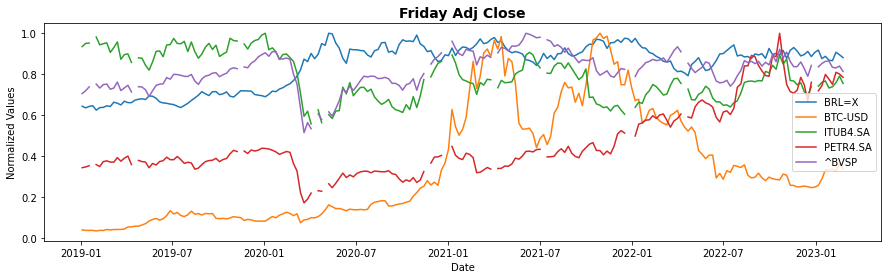

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,4))

df_Friday = df_Friday.set_index('Date')

for c in ['BRL=X', 'BTC-USD', 'ITUB4.SA', 'PETR4.SA', '^BVSP']:
  plt.plot(df_Friday[c], label=c)

plt.title('Friday Adj Close', fontsize=14, weight='bold')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()

plt.show()

(Moodle) Com base no gráfico produzido, qual ativo apresentou crescimento mais consistente no período? 